# Singapore

Background:
The island city-state on the southern tip of the Malay Peninsula has seen many rulers in its history. It has been an outpost of the ancient Sumatran Srivijaya empire; it was part of the Sultanate of Johore in the 15th and 16th centuries, and it was burned down by Portuguese forces in 1617. At the beginning of the 19th century, Singapore became a trade post and settlement of the British East India Company and a British crown colony some years later.

Singapore is today (beside Monaco) the most densely populated independent country in the world. Its strategic location at the Strait of Malacca and the South China Sea, combined with a mostly corruption-free government, a skilled workforce, pro-foreign investment and export-oriented, led to a thriving free-market economy that attracts international investment funds on a large scale despite its relatively high-cost operating environment.

# Begin

In [1]:
#  !python library_conso.py
#  import library_conso  # quick import 
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) # ? or change
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pydrive
import pandas_profiling
from pandas_profiling import ProfileReport
import glob  # trying to automate it 
import numpy as np
from bokeh.layouts import column
from bokeh.models import Div, TeX
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
# !dir ..\data\all_hpi
#  03/11/2022  11:05 AM            12,287 metadata-resale-flat-prices.txt
#  03/11/2022  11:05 AM        22,922,820 resale-flat-prices-based-on-approval-date-1990-1999.csv
#  03/11/2022  11:05 AM        29,739,597 resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
#  03/11/2022  11:05 AM         3,108,078 resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
#  03/11/2022  11:05 AM        11,978,170 resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
#  03/11/2022  11:05 AM         4,212,975 resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv    
# 
# could use glob here, but i aldo do care about the timestamps...
# i also have this stored on S3 for direct access instead of local 
df1 = pd.read_csv(r'D:\GITHUB_Repos\Singapore\ENTER\data\all_hpi\resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv(r'D:\GITHUB_Repos\Singapore\ENTER\data\all_hpi\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3 = pd.read_csv(r'D:\GITHUB_Repos\Singapore\ENTER\data\all_hpi\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df4 = pd.read_csv(r'D:\GITHUB_Repos\Singapore\ENTER\data\all_hpi\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df5 = pd.read_csv(r'D:\GITHUB_Repos\Singapore\ENTER\data\all_hpi\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
df1.head(); df2.head(); df3.head(); df4.head(); df5.head()   # yes, some data csv dont have remaining_lease col... 

month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0           31.00        IMPROVED                 1977          9000  
1           31.00        IMPROVED                 1977          6000  
2           31.00        IMPROVED                 1977          8000  
3           31.00        IMPROVED                 1977          6000  
4           73.00  NEW GENERATION                 1976         47200

month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0           69.00        Improved                 1986     147000.00  
1           61.00        Improved                 1986     144000.00  
2           73.00  New Generation                 1976     159000.00  
3           73.00  New Generation                 1976     167000.00  
4           67.00  New Generation                 1976     163000.00

month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2  2012-03  ANG MO KIO    3 ROOM   610   ANG MO KIO AVE 4     06 TO 10   
3  2012-03  ANG MO KIO    3 ROOM   474  ANG MO KIO AVE 10     01 TO 05   
4  2012-03  ANG MO KIO    3 ROOM   604   ANG MO KIO AVE 5     06 TO 10   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0           45.00        Improved                 1986     250000.00  
1           44.00        Improved                 1980     265000.00  
2           68.00  New Generation                 1980     315000.00  
3           67.00  New Generation                 1984     320000.00  
4           67.00  New Generation                 1980     321000.00

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0           60.00        Improved                 1986               70   
1           68.00  New Generation                 1981               65   
2           69.00  New Generation                 1980               64   
3           68.00  New Generation                 1979               63   
4           68.00  New Generation                 1980               64   

   resale_price  
0     255000.00  
1     275000.00  
2     285000.00  
3     290000.00  
4     290000.00

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0           44.00        Improved                 1979  61 years 04 months   
1           67.00  New Generation                 1978  60 years 07 months   
2           67.00  New Generation                 1980  62 years 05 months   
3           68.00  New Generation                 1980   62 years 01 month   
4           67.00  New Generation                 1980  62 years 05 months   

   resale_price  
0     232000.00  
1     250000.00  
2     262000.00  
3     265000.00  
4     265000.00

In [4]:
df = df1.append(df2).append(df3).append(df4).append(df5).reset_index(drop=True)  # .sort_values('whatever')

In [5]:
df.tail()

month    town  flat_type block     street_name storey_range  \
867886  2022-03  YISHUN     5 ROOM  501B    YISHUN ST 51     07 TO 09   
867887  2022-03  YISHUN     5 ROOM   820    YISHUN ST 81     07 TO 09   
867888  2022-03  YISHUN  EXECUTIVE   359  YISHUN RING RD     01 TO 03   
867889  2022-03  YISHUN  EXECUTIVE   387  YISHUN RING RD     04 TO 06   
867890  2022-03  YISHUN  EXECUTIVE   277    YISHUN ST 22     10 TO 12   

        floor_area_sqm  flat_model  lease_commence_date  resale_price  \
867886          112.00    Improved                 2018     652000.00   
867887          122.00    Improved                 1988     585000.00   
867888          145.00   Apartment                 1988     682000.00   
867889          146.00  Maisonette                 1988     720000.00   
867890          146.00  Maisonette                 1985     788000.00   

           remaining_lease  
867886  94 years 11 months  
867887  65 years 06 months  
867888  65 years 05 months  
867889  65 years 04 months  
867890  62 years 06 months

In [6]:
assert  len(df) == len(df1) + len(df2) + len(df3) + len(df4) + len(df5), "Warning:  During merge, you lose some data rows..."
assert  len(df) == 867891

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867891 entries, 0 to 867890
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                867891 non-null  object 
 1   town                 867891 non-null  object 
 2   flat_type            867891 non-null  object 
 3   block                867891 non-null  object 
 4   street_name          867891 non-null  object 
 5   storey_range         867891 non-null  object 
 6   floor_area_sqm       867891 non-null  float64
 7   flat_model           867891 non-null  object 
 8   lease_commence_date  867891 non-null  int64  
 9   resale_price         867891 non-null  float64
 10  remaining_lease      158841 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 72.8+ MB


In [8]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [9]:
df.resale_price.describe()

count    867891.00
mean     303752.12
std      156280.58
min        5000.00
25%      186000.00
50%      283000.00
75%      395000.00
max     1360000.00
Name: resale_price, dtype: float64

# Warning

* These prices go way way back, so you need to 'present day' convert them...
* Missing data col (remaining_lease) for three of the chunks of data files
* Has there always been 27 towns ?  Wasn't it less at some point ?  (careful about newer town/cities)
* flat_type:  'MULTI GENERATION' and 'MULTI-GENERATION', same thing ? 

# Unique Values per Feature

In [10]:
for c in df.columns: print(c)  # there are all the cols I have to work with initially

month
town
flat_type
block
street_name
storey_range
floor_area_sqm
flat_model
lease_commence_date
resale_price
remaining_lease


In [11]:
df.town.unique().tolist()  # len(df.town.unique()) - >  27 unique towns 

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'QUEENSTOWN',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN',
 'LIM CHU KANG',
 'SEMBAWANG',
 'BUKIT PANJANG',
 'PASIR RIS',
 'PUNGGOL']

In [12]:
df['town'] = df['town'].str.title() # capitalize the first letter of each word in town 

In [13]:
df.town.unique().tolist()  # len(df.town.unique()) - >  27 unique towns 

['Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Timah',
 'Central Area',
 'Choa Chu Kang',
 'Clementi',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang/Whampoa',
 'Marine Parade',
 'Queenstown',
 'Sengkang',
 'Serangoon',
 'Tampines',
 'Toa Payoh',
 'Woodlands',
 'Yishun',
 'Lim Chu Kang',
 'Sembawang',
 'Bukit Panjang',
 'Pasir Ris',
 'Punggol']

https://en.wikipedia.org/wiki/Ang_Mo_Kio

In [14]:
# read list of towns from wikipedia for sanity 

# interesting:  https://www.hdb.gov.sg/cs/infoweb/about-us/history
    
# As of 2021, there in 23 towns and 3 estates across Singapore. These statistics reflect the boundaries
# of HDB towns and are not necessarily the same as planning area statistics.

towns_singapore_scraped_wikipedia = pd.read_html('https://en.wikipedia.org/wiki/New_towns_of_Singapore')
towns_singapore_scraped_wikipedia[0]

Name (English/Malay) Chinese           Pinyin              Tamil  \
0            Ang Mo Kio     宏茂桥      hóngmàoqiáo        ஆங் மோ கியோ   
1                 Bedok      勿洛            wùluò               பிடோ   
2                Bishan      碧山           bìshān             பீஷான்   
3           Bukit Batok    武吉巴督         wǔjíbādū  புக்கிட் பாத்தோக்   
4           Bukit Merah      红山         hóngshān      புக்கிட் மேரா   
5         Bukit Panjang    武吉班让      wǔjíbānràng  புக்கிட் பாஞ்சாங்   
6         Choa Chu Kang     蔡厝港       càicuògǎng       சுவா சூ காங்   
7              Clementi     金文泰        jīnwéntài         கிளிமெண்டி   
8               Geylang      芽笼           yálóng             கேலாங்   
9               Hougang      后港          hòugǎng            ஹவ்காங்   
10          Jurong East     裕廊东       yùlángdōng             ஜூரோங்   
11          Jurong West     裕廊西         yùlángxī             ஜூரோங்   
12      Kallang/Whampoa   加冷／黄浦  jiālĕng/huángpǔ             காலாங்   
13            Pasir Ris     巴西立           bāxīlì        பாசிர் ரிஸ்   
14              Punggol      榜鵝           bǎng'é           பொங்கோல்   
15           Queenstown     女皇镇      nǚhuángzhèn      குவீன்ஸ்டவுன்   
16            Sembawang     三巴旺        sānbāwàng          செம்பவாங்   
17             Sengkang      盛港        shènggǎng            செங்காங   
18            Serangoon     实龙岗      shílónggāng         சிராங்கூன்   
19             Tampines     淡滨尼         dànbīnní         தெம்பினிஸ்   
20            Toa Payoh     大巴窑          dàbāyáo            தோ பாயோ   
21            Woodlands      兀兰            wùlán         ஊட்லண்ட்ஸ்   
22               Yishun      义顺           yìshùn             யீஷூன்   

    Total area (km2)  Residential area (km2)  Dwelling units  \
0               6.38                    2.83           50726   
1               9.37                    4.18           62816   
2               6.90                    1.72           20072   
3               7.85                    2.91           44285   
4               8.58                    3.12           54227   
5               4.89                    2.19           35325   
6               5.83                    3.07           48900   
7               4.12                    2.03           26730   
8               6.78                    2.14           30892   
9              13.09                    3.67           57272   
10              3.84                    1.65           24122   
11              9.87                    4.80           75208   
12              7.99                    2.10           39931   
13              6.01                    3.18           29654   
14              9.57                    3.74           50663   
15              6.94                    2.10           33164   
16              7.08                    3.31           30020   
17             10.55                    3.97           69196   
18              7.37                    1.63           21632   
19             12.00                    5.49           72683   
20              5.56                    2.48           39737   
21             11.98                    4.80           69900   
22              7.78                    3.98           65158   

    Projected ultimate  Population  
0                58000      138200  
1                79000      187900  
2                34000       61100  
3                54000      121400  
4                68000      141400  
5                44000      118900  
6                62000      167200  
7                39000       69500  
8                50000       86000  
9                72000      179700  
10               31000       75400  
11               94000      253800  
12               57000      105200  
13               44000      106600  
14               96000      146900  
15               60000       81200  
16               65000       81500  
17               96000      217700  
18               30000       66800  
19              11000

In [15]:
towns_singapore_scraped_wikipedia[1]  #  estates ? 

Name (English/Malay) Chinese           Pinyin                 Tamil  \
0          Bukit Timah    武吉知马        wūjízhīmǎ         புக்கித் திமா   
1        Marine Parade    马林百列      mǎlínbǎiliè           மரின் பரேட்   
2         Central Area   新加坡中區  xīnjiāpōzhōngqū  சிங்கப்பூர் மாவட்டம்   

   Dwelling units  Population  
0            2423        8100  
1            6537       20800  
2            9459       27200

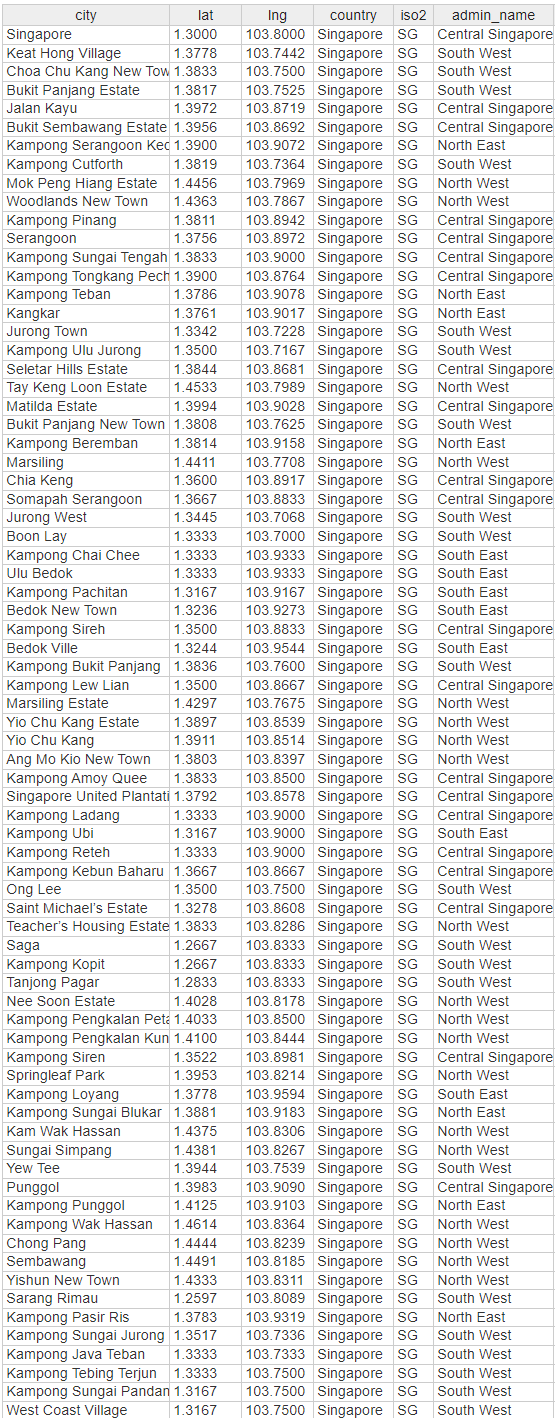

In [16]:
df.flat_type.unique().tolist() 
# Multi and Multi the same ?

['1 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 '2 ROOM',
 'EXECUTIVE',
 'MULTI GENERATION',
 'MULTI-GENERATION']

In [17]:
df.flat_type.value_counts()

4 ROOM              326735
3 ROOM              281589
5 ROOM              181442
EXECUTIVE            65888
2 ROOM               10423
1 ROOM                1285
MULTI GENERATION       279
MULTI-GENERATION       250
Name: flat_type, dtype: int64

In [18]:
len(df.block.unique())  # there are many unique blocks, mainly numbers, but do include LETTERS as well
# thus it is object/string

2578

In [19]:
len(df.street_name.unique().tolist())  # 577 unique street names...

577

In [20]:
df.storey_range.unique().tolist()

['10 TO 12',
 '04 TO 06',
 '07 TO 09',
 '01 TO 03',
 '13 TO 15',
 '19 TO 21',
 '16 TO 18',
 '25 TO 27',
 '22 TO 24',
 '28 TO 30',
 '31 TO 33',
 '40 TO 42',
 '37 TO 39',
 '34 TO 36',
 '06 TO 10',
 '01 TO 05',
 '11 TO 15',
 '16 TO 20',
 '21 TO 25',
 '26 TO 30',
 '36 TO 40',
 '31 TO 35',
 '46 TO 48',
 '43 TO 45',
 '49 TO 51']

In [21]:
df.storey_range.value_counts()

04 TO 06    219125
07 TO 09    197571
01 TO 03    176158
10 TO 12    167760
13 TO 15     56354
16 TO 18     21500
19 TO 21     10247
22 TO 24      6663
25 TO 27      2911
01 TO 05      2700
06 TO 10      2474
28 TO 30      1278
11 TO 15      1259
31 TO 33       427
34 TO 36       392
37 TO 39       380
16 TO 20       265
40 TO 42       192
21 TO 25        92
43 TO 45        44
26 TO 30        39
46 TO 48        38
49 TO 51        13
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [22]:
#  this is tricky.  you can label encode this or whatever, but maybe worth creating
#  a couple new entries in df.  maybe three features:
#  the first value, the last value, and the average value...
#  i.e. 04 - 06 would have new col for 4, 6, and 5... 

df['storey_first'] = df['storey_range'].str.split().str[0]
df['storey_last'] = df['storey_range'].str.split().str[2]
df['storey_first'] = pd.to_numeric(df['storey_first'])
df['storey_last'] = pd.to_numeric(df['storey_last'])
df['storey_avg'] = (df['storey_first'] + df['storey_last'])/2

In [23]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'storey_first', 'storey_last', 'storey_avg'],
      dtype='object')

In [24]:
df.flat_model.unique().tolist()
# we must assume these have many duplicated...
# i.e. IMPROVED actually equals Improved

['IMPROVED',
 'NEW GENERATION',
 'MODEL A',
 'STANDARD',
 'SIMPLIFIED',
 'MODEL A-MAISONETTE',
 'APARTMENT',
 'MAISONETTE',
 'TERRACE',
 '2-ROOM',
 'IMPROVED-MAISONETTE',
 'MULTI GENERATION',
 'PREMIUM APARTMENT',
 'Improved',
 'New Generation',
 'Model A',
 'Standard',
 'Apartment',
 'Simplified',
 'Model A-Maisonette',
 'Maisonette',
 'Multi Generation',
 'Adjoined flat',
 'Premium Apartment',
 'Terrace',
 'Improved-Maisonette',
 'Premium Maisonette',
 '2-room',
 'Model A2',
 'DBSS',
 'Type S1',
 'Type S2',
 'Premium Apartment Loft']

In [25]:
df['flat_model'] = df['flat_model'].str.lower()

In [26]:
df.flat_model.unique().tolist()

['improved',
 'new generation',
 'model a',
 'standard',
 'simplified',
 'model a-maisonette',
 'apartment',
 'maisonette',
 'terrace',
 '2-room',
 'improved-maisonette',
 'multi generation',
 'premium apartment',
 'adjoined flat',
 'premium maisonette',
 'model a2',
 'dbss',
 'type s1',
 'type s2',
 'premium apartment loft']

In [27]:
df.flat_model.value_counts()

model a                   242173
improved                  227656
new generation            182208
simplified                 55353
standard                   41047
premium apartment          40355
apartment                  33607
maisonette                 28192
model a2                    9490
dbss                        2596
model a-maisonette          1974
adjoined flat               1155
terrace                      670
multi generation             529
type s1                      360
type s2                      186
improved-maisonette          118
premium maisonette            85
premium apartment loft        84
2-room                        53
Name: flat_model, dtype: int64

https://www.teoalida.com/singapore/HDB-flat-size-comparison-1980s-vs-present.png

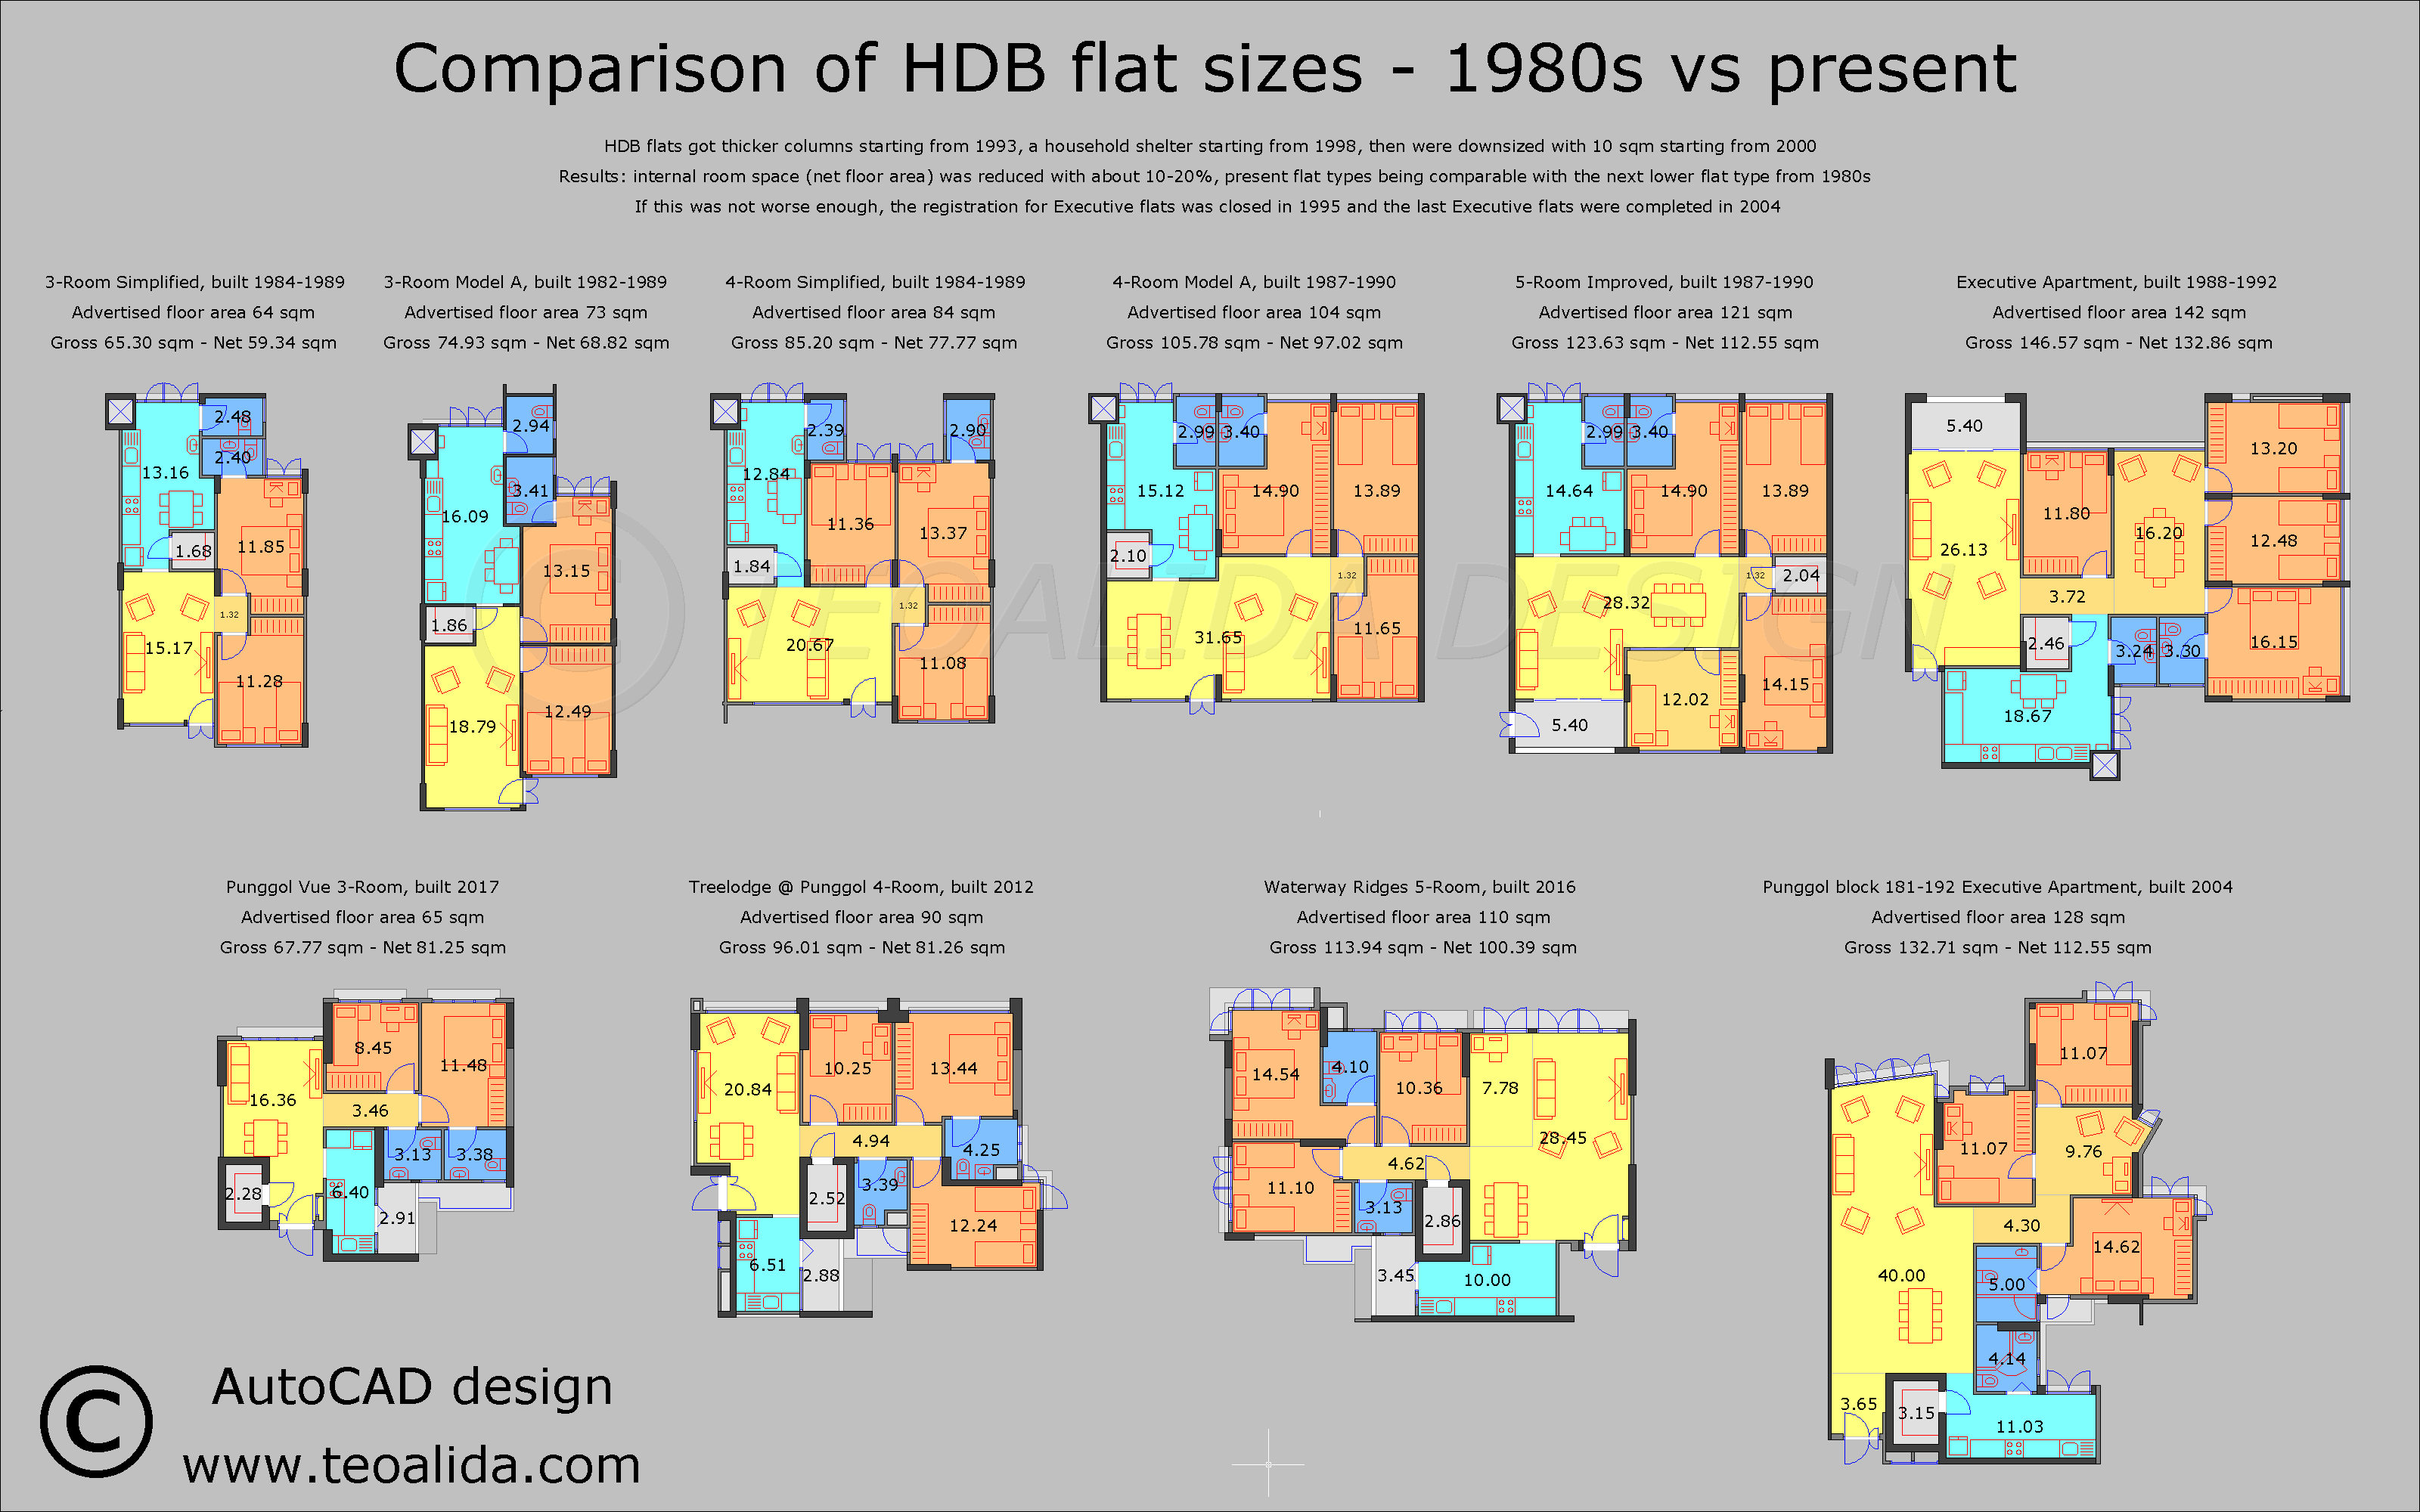

In [28]:
# wtf 

https://www.teoalida.com/singapore/hdbflattypes/

https://www.teoalida.com/singapore/hdbmap/

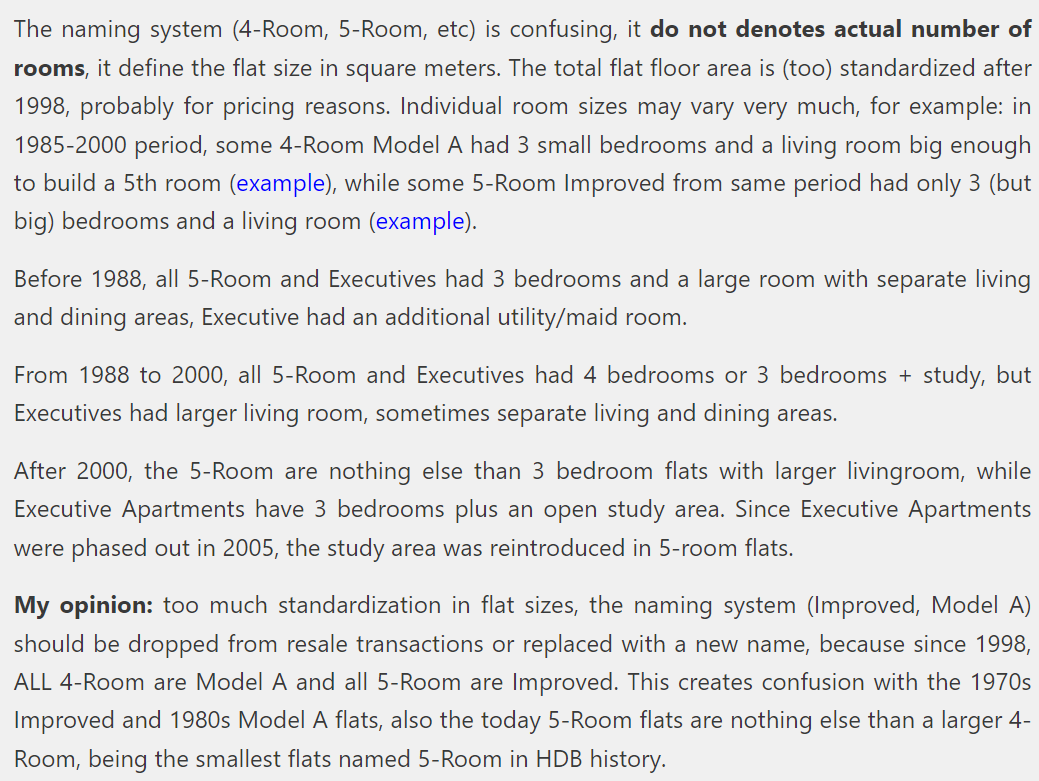

---

In [29]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'storey_first', 'storey_last', 'storey_avg'],
      dtype='object')

In [30]:
df.floor_area_sqm.describe()

count   867891.00
mean        95.68
std         25.96
min         28.00
25%         73.00
50%         93.00
75%        113.00
max        307.00
Name: floor_area_sqm, dtype: float64

In [31]:
# create new variable of sqft for us unsophisticated Americans
df['floor_area_sqft']  = df['floor_area_sqm'] * 10.7639

In [32]:
df.floor_area_sqft.describe()

count   867891.00
mean      1029.93
std        279.42
min        301.39
25%        785.76
50%       1001.04
75%       1216.32
max       3304.52
Name: floor_area_sqft, dtype: float64

In [33]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'storey_first', 'storey_last', 'storey_avg',
       'floor_area_sqft'],
      dtype='object')

In [34]:
df.resale_price.describe()

count    867891.00
mean     303752.12
std      156280.58
min        5000.00
25%      186000.00
50%      283000.00
75%      395000.00
max     1360000.00
Name: resale_price, dtype: float64

In [35]:
df.flat_type.unique()  # maybe convert the E and the Multi-G to like 6 ROOM and 7 ROOM ?  
# figure out way to quantify and rank, you can just label encode this. 
# make sure they are in numeric significant 'order' ranked, etc crap

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [36]:
df.lease_commence_date.unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [37]:
df.lease_commence_date.value_counts()

1985    84260
1984    61034
1988    48699
1987    41179
1978    39833
1986    37131
1989    30943
1980    30918
1979    29820
1997    29368
1993    26992
1996    26782
1998    24187
1983    22235
1976    20674
1981    20110
1977    19976
1999    19399
1992    19338
1995    18137
2001    17845
2000    17007
1975    16704
2003    14287
1974    14022
1982    12800
2002    11468
1970    10981
1990     8915
1973     8302
1969     8091
2004     7706
1971     7626
2015     7623
1994     6229
1967     5939
1972     5586
2016     4445
2013     4322
2012     4013
2005     3617
2014     2829
2006     2815
2017     2650
2011     2238
2008     1862
1968     1822
2009     1559
1991     1192
2010     1159
2007      836
2018      322
2019       34
1966       30
Name: lease_commence_date, dtype: int64

In [38]:
# df.remaining_lease.unique()
#  snippet 
# array([nan, 70.0, 65.0, 64.0, 63.0, 62.0, 69.0, 60.0, 61.0, 86.0, 77.0,
#        80.0, 90.0, 87.0, 66.0, 58.0, 94.0, 71.0, 68.0, 84.0, 73.0, 79.0,
#        76.0, 72.0, 82.0, 74.0, 67.0, 88.0, 81.0, 89.0, 53.0, 54.0, 55.0,
#        57.0, 93.0, 83.0, 85.0, 92.0, 91.0, 59.0, 95.0, 52.0, 51.0, 56.0,
#        75.0, 96.0, 78.0, 50.0, 97.0, 49.0, 48.0, '61 years 04 months',
#        '60 years 07 months', '62 years 05 months', '62 years 01 month',
#        '63 years', '61 years 06 months', '58 years 04 months',
#        '59 years 08 months', '59 years 06 months', '60 years',
#        '62 years 08 months', '61 years', '60 years 10 months',
#        '59 years 03 months', '61 years 05 months', '60 years 04 months',
#        '62 years', '60 years 03 months', '63 years 09 months',
#        '61 years 01 month', '61 years 10 months', '58 years 06 months',
#        '59 years 04 months', '62 years 11 months', '60 years 08 months',
#        '93 years 08 months', '93 years 07 months', '60 years 01 month',

In [39]:
df.remaining_lease.value_counts

<bound method IndexOpsMixin.value_counts of 0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
867886    94 years 11 months
867887    65 years 06 months
867888    65 years 05 months
867889    65 years 04 months
867890    62 years 06 months
Name: remaining_lease, Length: 867891, dtype: object>

In [40]:
# one approach:  
# we really most likely care about the number of years..
# break out the values like: 94 years 11 months and push
# to new col years and new col months (or call it a decimal of years)

In [41]:
# 94 years 11 months

In [42]:
df[df['remaining_lease'].str.contains("years", na=False)].head()

month        town flat_type block        street_name storey_range  \
746203  2017-01  Ang Mo Kio    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
746204  2017-01  Ang Mo Kio    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
746205  2017-01  Ang Mo Kio    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
746206  2017-01  Ang Mo Kio    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
746207  2017-01  Ang Mo Kio    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
746203           44.00        improved                 1979     232000.00   
746204           67.00  new generation                 1978     250000.00   
746205           67.00  new generation                 1980     262000.00   
746206           68.00  new generation                 1980     265000.00   
746207           67.00  new generation                 1980     265000.00   

           remaining_lease  storey_first  storey_last  storey_avg  \
746203  61 years 04 months            10           12       11.00   
746204  60 years 07 months             1            3        2.00   
746205  62 years 05 months             1            3        2.00   
746206   62 years 01 month             4            6        5.00   
746207  62 years 05 months             1            3        2.00   

        floor_area_sqft  
746203           473.61  
746204           721.18  
746205           721.18  
746206           731.95  
746207           721.18

In [43]:

# df[df['remaining_lease'].str.contains("years", na=False)]['remaining_lease'] 
# not sure what makes sense to do here...


---

# Pandas Profiling

In [44]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [45]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 11004

In [47]:
labelencoder = LabelEncoder()

df['flat_type_label'] = labelencoder.fit_transform(df['flat_type'])

df

month        town  flat_type block       street_name storey_range  \
0       1990-01  Ang Mo Kio     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  Ang Mo Kio     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  Ang Mo Kio     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  Ang Mo Kio     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  Ang Mo Kio     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
867886  2022-03      Yishun     5 ROOM  501B      YISHUN ST 51     07 TO 09   
867887  2022-03      Yishun     5 ROOM   820      YISHUN ST 81     07 TO 09   
867888  2022-03      Yishun  EXECUTIVE   359    YISHUN RING RD     01 TO 03   
867889  2022-03      Yishun  EXECUTIVE   387    YISHUN RING RD     04 TO 06   
867890  2022-03      Yishun  EXECUTIVE   277      YISHUN ST 22     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                31.00        improved                 1977       9000.00   
1                31.00        improved                 1977       6000.00   
2                31.00        improved                 1977       8000.00   
3                31.00        improved                 1977       6000.00   
4                73.00  new generation                 1976      47200.00   
...                ...             ...                  ...           ...   
867886          112.00        improved                 2018     652000.00   
867887          122.00        improved                 1988     585000.00   
867888          145.00       apartment                 1988     682000.00   
867889          146.00      maisonette                 1988     720000.00   
867890          146.00      maisonette                 1985     788000.00   

           remaining_lease  storey_first  storey_last  storey_avg  \
0                      NaN            10           12       11.00   
1                      NaN             4            6        5.00   
2                      NaN            10           12       11.00   
3                      NaN             7            9        8.00   
4                      NaN             4            6        5.00   
...                    ...           ...          ...         ...   
867886  94 years 11 months             7            9        8.00   
867887  65 years 06 months             7            9        8.00   
867888  65 years 05 months             1            3        2.00   
867889  65 years 04 months             4            6        5.00   
867890  62 years 06 months            10           12       11.00   

        floor_area_sqft  flat_type_label  
0                333.68                0  
1                333.68                0  
2                333.68                0  
3                333.68                0  
4                785.76                2  
...                 ...              ...  
867886          1205.56                4  
867887          1313.20                4  
867888          1560.77                5  
867889          1571.53                5  
867890          1571.53                5  

[867891 rows x 16 columns]

In [48]:
df.drop('flat_type', axis=1, inplace=True)

In [49]:
df.street_name.unique()  # large large number of them 

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [50]:
df.flat_model.unique()

array(['improved', 'new generation', 'model a', 'standard', 'simplified',
       'model a-maisonette', 'apartment', 'maisonette', 'terrace',
       '2-room', 'improved-maisonette', 'multi generation',
       'premium apartment', 'adjoined flat', 'premium maisonette',
       'model a2', 'dbss', 'type s1', 'type s2', 'premium apartment loft'],
      dtype=object)

In [51]:
labelencoder = LabelEncoder()
df['flat_model_label'] = labelencoder.fit_transform(df['flat_model'])
df

month        town block       street_name storey_range  \
0       1990-01  Ang Mo Kio   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  Ang Mo Kio   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  Ang Mo Kio   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  Ang Mo Kio   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  Ang Mo Kio   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...   ...               ...          ...   
867886  2022-03      Yishun  501B      YISHUN ST 51     07 TO 09   
867887  2022-03      Yishun   820      YISHUN ST 81     07 TO 09   
867888  2022-03      Yishun   359    YISHUN RING RD     01 TO 03   
867889  2022-03      Yishun   387    YISHUN RING RD     04 TO 06   
867890  2022-03      Yishun   277      YISHUN ST 22     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                31.00        improved                 1977       9000.00   
1                31.00        improved                 1977       6000.00   
2                31.00        improved                 1977       8000.00   
3                31.00        improved                 1977       6000.00   
4                73.00  new generation                 1976      47200.00   
...                ...             ...                  ...           ...   
867886          112.00        improved                 2018     652000.00   
867887          122.00        improved                 1988     585000.00   
867888          145.00       apartment                 1988     682000.00   
867889          146.00      maisonette                 1988     720000.00   
867890          146.00      maisonette                 1985     788000.00   

           remaining_lease  storey_first  storey_last  storey_avg  \
0                      NaN            10           12       11.00   
1                      NaN             4            6        5.00   
2                      NaN            10           12       11.00   
3                      NaN             7            9        8.00   
4                      NaN             4            6        5.00   
...                    ...           ...          ...         ...   
867886  94 years 11 months             7            9        8.00   
867887  65 years 06 months             7            9        8.00   
867888  65 years 05 months             1            3        2.00   
867889  65 years 04 months             4            6        5.00   
867890  62 years 06 months            10           12       11.00   

        floor_area_sqft  flat_type_label  flat_model_label  
0                333.68                0                 4  
1                333.68                0                 4  
2                333.68                0                 4  
3                333.68                0                 4  
4                785.76                2                11  
...                 ...              ...               ...  
867886          1205.56                4                 4  
867887          1313.20                4                 4  
867888          1560.77                5                 2  
867889          1571.53                5                 6  
867890          1571.53                5                 6  

[867891 rows x 16 columns]

In [52]:
df.drop('flat_model', axis=1, inplace=True)

In [53]:
df.dtypes

month                   object
town                    object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
remaining_lease         object
storey_first             int64
storey_last              int64
storey_avg             float64
floor_area_sqft        float64
flat_type_label          int32
flat_model_label         int32
dtype: object

In [54]:

labelencoder = LabelEncoder()
df['town'] = labelencoder.fit_transform(df['town'])
df.town.unique()


array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [55]:
df.drop('town', axis=1, inplace=True)

In [56]:
df.dtypes

month                   object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
remaining_lease         object
storey_first             int64
storey_last              int64
storey_avg             float64
floor_area_sqft        float64
flat_type_label          int32
flat_model_label         int32
dtype: object

In [57]:
df

month block       street_name storey_range  floor_area_sqm  \
0       1990-01   309  ANG MO KIO AVE 1     10 TO 12           31.00   
1       1990-01   309  ANG MO KIO AVE 1     04 TO 06           31.00   
2       1990-01   309  ANG MO KIO AVE 1     10 TO 12           31.00   
3       1990-01   309  ANG MO KIO AVE 1     07 TO 09           31.00   
4       1990-01   216  ANG MO KIO AVE 1     04 TO 06           73.00   
...         ...   ...               ...          ...             ...   
867886  2022-03  501B      YISHUN ST 51     07 TO 09          112.00   
867887  2022-03   820      YISHUN ST 81     07 TO 09          122.00   
867888  2022-03   359    YISHUN RING RD     01 TO 03          145.00   
867889  2022-03   387    YISHUN RING RD     04 TO 06          146.00   
867890  2022-03   277      YISHUN ST 22     10 TO 12          146.00   

        lease_commence_date  resale_price     remaining_lease  storey_first  \
0                      1977       9000.00                 NaN            10   
1                      1977       6000.00                 NaN             4   
2                      1977       8000.00                 NaN            10   
3                      1977       6000.00                 NaN             7   
4                      1976      47200.00                 NaN             4   
...                     ...           ...                 ...           ...   
867886                 2018     652000.00  94 years 11 months             7   
867887                 1988     585000.00  65 years 06 months             7   
867888                 1988     682000.00  65 years 05 months             1   
867889                 1988     720000.00  65 years 04 months             4   
867890                 1985     788000.00  62 years 06 months            10   

        storey_last  storey_avg  floor_area_sqft  flat_type_label  \
0                12       11.00           333.68                0   
1                 6        5.00           333.68                0   
2                12       11.00           333.68                0   
3                 9        8.00           333.68                0   
4                 6        5.00           785.76                2   
...             ...         ...              ...              ...   
867886            9        8.00          1205.56                4   
867887            9        8.00          1313.20                4   
867888            3        2.00          1560.77                5   
867889            6        5.00          1571.53                5   
867890           12       11.00          1571.53                5   

        flat_model_label  
0                      4  
1                      4  
2                      4  
3                      4  
4                     11  
...                  ...  
867886                 4  
867887                 4  
867888                 2  
867889                 6  
867890                 6  

[867891 rows x 14 columns]

In [58]:
df.lease_commence_date.unique()   # this is a YEAR, but should you label encode it, OR keep it as an year integer ??? 

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [59]:
df.dtypes 

month                   object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
remaining_lease         object
storey_first             int64
storey_last              int64
storey_avg             float64
floor_area_sqft        float64
flat_type_label          int32
flat_model_label         int32
dtype: object

In [ ]:
# fix or remove ? 

#  df['flat_type_labels'] = labelencoder.fit_transform(df['flat_type'])

In [61]:

len(df)


867891

## Encode 

In [62]:
df_backup = df.copy()

# Correlation Plot

In [63]:
c = df.corr()
c

floor_area_sqm  lease_commence_date  resale_price  \
floor_area_sqm                 1.00                 0.43          0.60   
lease_commence_date            0.43                 1.00          0.52   
resale_price                   0.60                 0.52          1.00   
storey_first                   0.05                 0.15          0.23   
storey_last                    0.05                 0.15          0.23   
storey_avg                     0.05                 0.15          0.23   
floor_area_sqft                1.00                 0.43          0.60   
flat_type_label                0.95                 0.45          0.63   
flat_model_label              -0.41                -0.21         -0.27   

                     storey_first  storey_last  storey_avg  floor_area_sqft  \
floor_area_sqm               0.05         0.05        0.05             1.00   
lease_commence_date          0.15         0.15        0.15             0.43   
resale_price                 0.23         0.23        0.23             0.60   
storey_first                 1.00         1.00        1.00             0.05   
storey_last                  1.00         1.00        1.00             0.05   
storey_avg                   1.00         1.00        1.00             0.05   
floor_area_sqft              0.05         0.05        0.05             1.00   
flat_type_label              0.08         0.08        0.08             0.95   
flat_model_label            -0.08        -0.08       -0.08            -0.41   

                     flat_type_label  flat_model_label  
floor_area_sqm                  0.95             -0.41  
lease_commence_date             0.45             -0.21  
resale_price                    0.63             -0.27  
storey_first                    0.08             -0.08  
storey_last                     0.08             -0.08  
storey_avg                      0.08             -0.08  
floor_area_sqft                 0.95             -0.41  
flat_type_label                 1.00             -0.37  
flat_model_label               -0.37              1.00

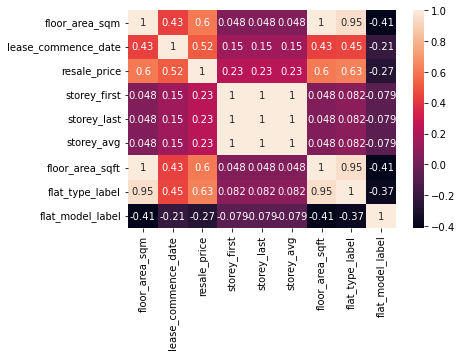

In [64]:
sns.heatmap(c, annot=True)
plt.show();

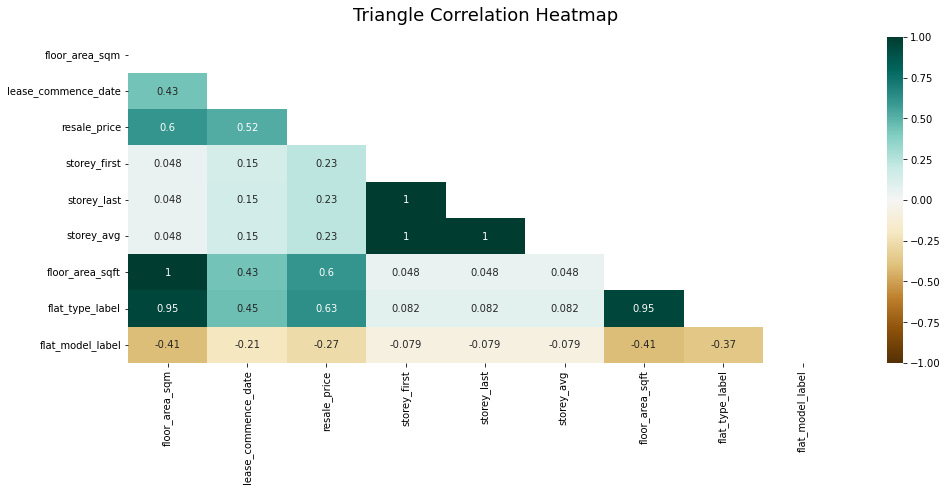

In [65]:
# cleaner view 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Standard EDA

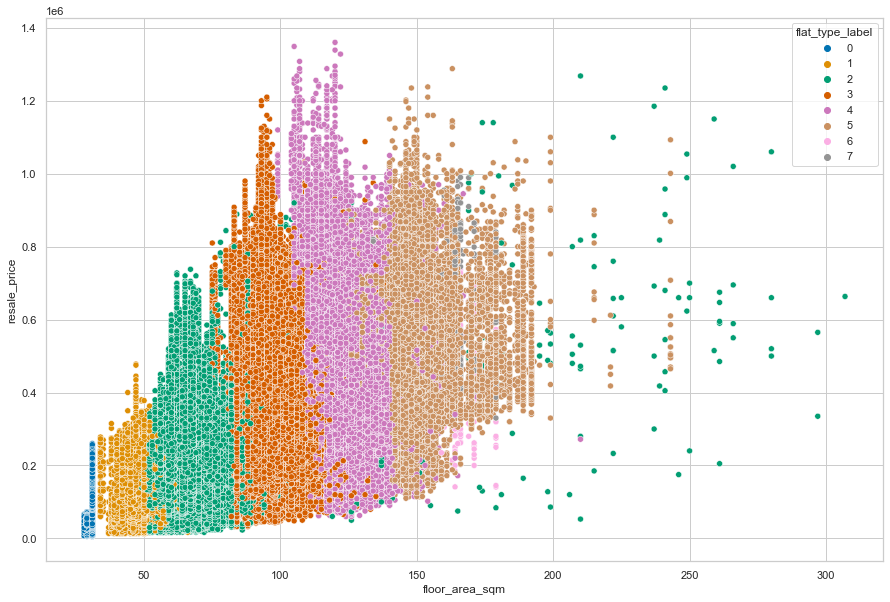

In [66]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
sns.scatterplot(x="floor_area_sqm", y="resale_price", hue = "flat_type_label", palette='colorblind', data=df); 

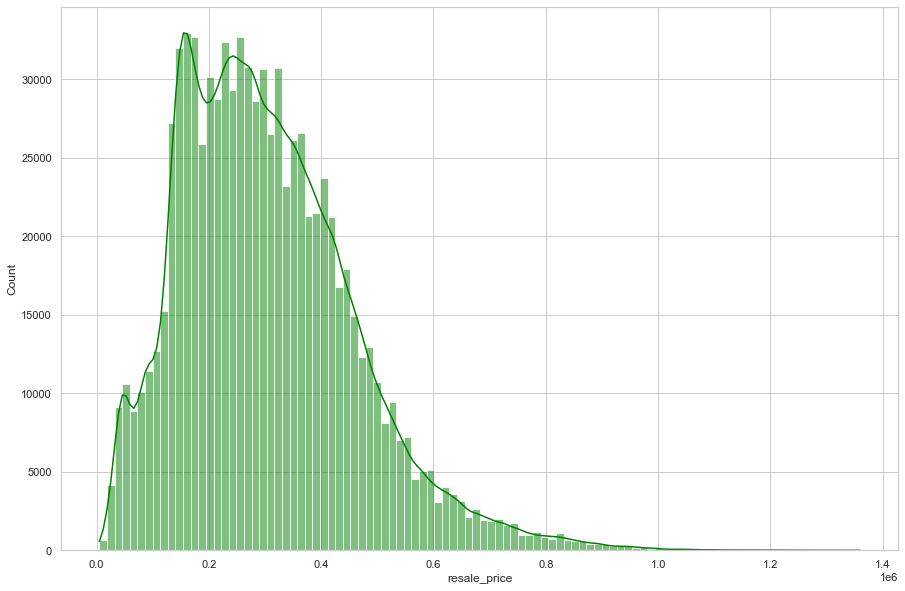

In [67]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x="resale_price", color="green", kde=True, bins=100)
plt.show();

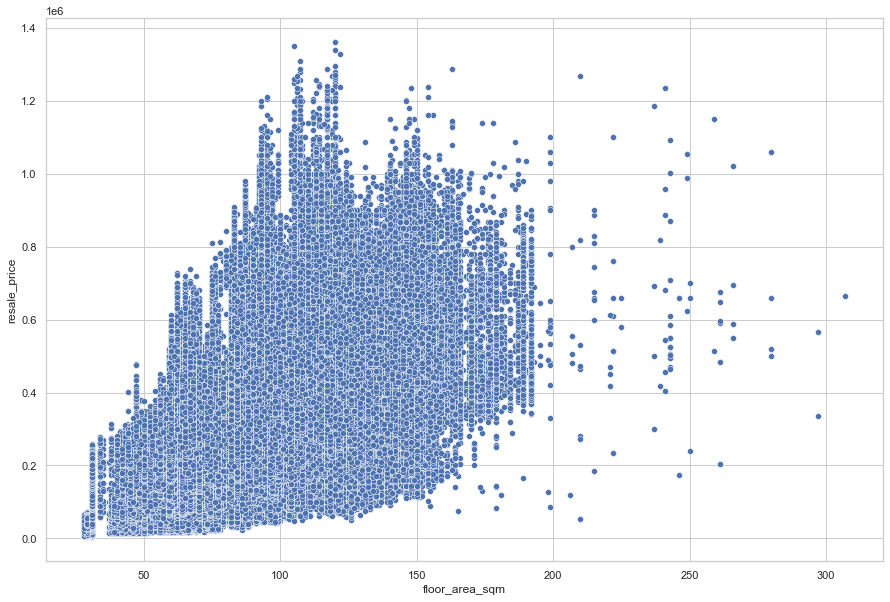

In [68]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="floor_area_sqm", y="resale_price",data=df); 

In [69]:

p = figure(width=670, height=400, toolbar_location=None,
           title="Normal (Gaussian) Distribution")

n = 1000

rng = np.random.default_rng(825914)

x = rng.normal(loc=4.7, scale=14.3, size=n)

# Scale random data so that it has mean of 0 and standard deviation of 1

xbar = x.mean()

sigma = x.std()

scaled = (x - xbar) / sigma


# Histogram

bins = np.linspace(-3, 3, 40)

hist, edges = np.histogram(scaled, density=True, bins=bins)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue", line_color="white",
         legend_label=f"{n} random samples")

# Probability density function

x = np.linspace(-3.0, 3.0, 100)

pdf = np.exp(-0.5*x**2) / np.sqrt(2.0*np.pi)

p.line(x, pdf, line_width=2, line_color="navy",
       legend_label="Probability Density Function")

p.y_range.start = 0

p.xaxis.axis_label = "x"

p.yaxis.axis_label = "PDF(x)"

p.xaxis.ticker = [-3, -2, -1, 0, 1, 2, 3]

p.xaxis.major_label_overrides = {
    -3: TeX(r"\overline{x} - 3\sigma"),
    -2: TeX(r"\overline{x} - 2\sigma"),
    -1: TeX(r"\overline{x} - \sigma"),
     0: TeX(r"\overline{x}"),
     1: TeX(r"\overline{x} + \sigma"),
     2: TeX(r"\overline{x} + 2\sigma"),
     3: TeX(r"\overline{x} + 3\sigma"),}

p.yaxis.ticker = [0, 0.1, 0.2, 0.3, 0.4]

p.yaxis.major_label_overrides = {
    0: TeX(r"0"),
    0.1: TeX(r"0.1/\sigma"),
    0.2: TeX(r"0.2/\sigma"),
    0.3: TeX(r"0.3/\sigma"),
    0.4: TeX(r"0.4/\sigma"),}

div = Div(text=r"""
A histogram of a samples from a Normal (Gaussian) distribution, together with
the ideal probability density function, given by the equation:
<p />
$$
\qquad PDF(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{1}{2}
\left(\frac{x-\overline{x}}{\sigma}\right)^2 \right]
$$
""")

show(column(p, div))

GlyphRenderer(id='1040', ...)

GlyphRenderer(id='1060', ...)

In [71]:

# Create the blank plot
# p = figure(plot_height = 600, plot_width = 600, 
#            title = 'Histogram of Arrival Delays',
#            x_axis_label = 'Delay (min)]', 
#            y_axis_label = 'Number of Flights')

# # Add a quad glyph
# p.quad(bottom=0, top=delays['flights'], 
#        left=delays['left'], right=delays['right'], 
#        fill_color='red', line_color='black')

# # Show the plot
# show(p)


<AxesSubplot:>

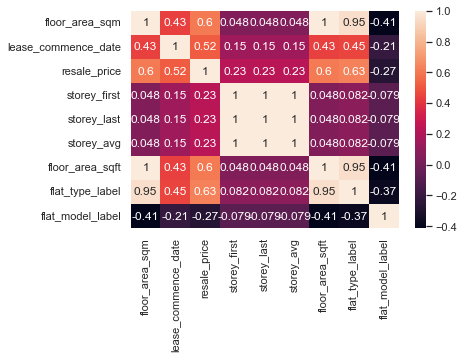

In [72]:

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [73]:
df.corr()

floor_area_sqm  lease_commence_date  resale_price  \
floor_area_sqm                 1.00                 0.43          0.60   
lease_commence_date            0.43                 1.00          0.52   
resale_price                   0.60                 0.52          1.00   
storey_first                   0.05                 0.15          0.23   
storey_last                    0.05                 0.15          0.23   
storey_avg                     0.05                 0.15          0.23   
floor_area_sqft                1.00                 0.43          0.60   
flat_type_label                0.95                 0.45          0.63   
flat_model_label              -0.41                -0.21         -0.27   

                     storey_first  storey_last  storey_avg  floor_area_sqft  \
floor_area_sqm               0.05         0.05        0.05             1.00   
lease_commence_date          0.15         0.15        0.15             0.43   
resale_price                 0.23         0.23        0.23             0.60   
storey_first                 1.00         1.00        1.00             0.05   
storey_last                  1.00         1.00        1.00             0.05   
storey_avg                   1.00         1.00        1.00             0.05   
floor_area_sqft              0.05         0.05        0.05             1.00   
flat_type_label              0.08         0.08        0.08             0.95   
flat_model_label            -0.08        -0.08       -0.08            -0.41   

                     flat_type_label  flat_model_label  
floor_area_sqm                  0.95             -0.41  
lease_commence_date             0.45             -0.21  
resale_price                    0.63             -0.27  
storey_first                    0.08             -0.08  
storey_last                     0.08             -0.08  
storey_avg                      0.08             -0.08  
floor_area_sqft                 0.95             -0.41  
flat_type_label                 1.00             -0.37  
flat_model_label               -0.37              1.00

```
# Metadata for Resale Flat Prices
---
Identifier: 7a339d20-3c57-4b11-a695-9348adfd7614
Name: resale-flat-prices
Title: Resale Flat Prices
Description:
  - Resale transacted prices.
  - Prior to March 2012, data is based on date of approval for the resale transactions.
  - For March 2012 onwards, the data is based on date of registration for the resale
    transactions.
Topics:
  - Infrastructure
Keywords:
  - Cost of Living
  - HDB
  - Housing
  - Property
  - Public Housing
  - Resale Flats
Publisher:
  Name: Housing and Development Board
  Admin 1:
    Name: Lau Pei Wen
    Department: HDB
    Email: LAU_Pei_Wen@hdb.gov.sg
  Admin 2:
    Name: Toh Xue Qin
    Department: HDB
    Email: toh_xue_qin@hdb.gov.sg
Sources:
  - Housing and Development Board
License: https://data.gov.sg/open-data-licence
Frequency: Monthly
Coverage: 1990-01-01 to 2022-03-10
Last Updated: 2022-03-11T01:00:32.750114
Resources:
  -
    Identifier: f1765b54-a209-4718-8d38-a39237f502b3
    Title: Resale flat prices based on registration date from Jan-2017 onwards
    Url: https://storage.data.gov.sg/resale-flat-prices/resources/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards-2022-03-11T01-00-31Z.csv
    Format: CSV
    Coverage: 2017-01-01 to 2022-03-10
    Last Updated: 2022-03-11T01:00:31.456350
    Schema:
      -
        Name: month
        Title: Month
        Type: datetime
        Sub Type: month
        Format: YYYY-MM
      -
        Name: town
        Title: Town
        Type: text
        Sub Type: general
      -
        Name: flat_type
        Title: Flat type
        Type: text
        Sub Type: general
      -
        Name: block
        Title: Block
        Type: text
        Sub Type: general
      -
        Name: street_name
        Title: Street name
        Type: text
        Sub Type: general
      -
        Name: storey_range
        Title: Storey range
        Type: text
        Sub Type: general
      -
        Name: floor_area_sqm
        Title: Floor area sqm
        Type: numeric
        Sub Type: general
        Unit Of Measure: sqm
      -
        Name: flat_model
        Title: Flat model
        Type: text
        Sub Type: general
      -
        Name: lease_commence_date
        Title: Lease commence date
        Type: datetime
        Sub Type: year
        Format: YYYY
      -
        Name: remaining_lease
        Title: Remaining lease
        Type: text
        Sub Type: general
      -
        Name: resale_price
        Title: Resale price
        Type: numeric
        Sub Type: general
        Unit Of Measure: $
  -
    Identifier: 1b702208-44bf-4829-b620-4615ee19b57c
    Title: Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec
      2016
    Url: https://storage.data.gov.sg/resale-flat-prices/resources/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016-2019-06-17T09-03-16Z.csv
    Format: CSV
    Coverage: 2015-01-01 to 2016-12-31
    Description:
      - Notes:
      - 
      - 1. The approximate floor area includes any recess area purchased, space adding
        item under HDB’s upgrading programmes, roof terrace, etc.
      - 
      - 2. The transactions exclude resale transactions that may not reflect the
        full market price such as resale between relatives and resale of part shares.
      - 
      - 3. Resale prices should be taken as indicative only as the resale prices
        agreed between buyers and sellers are dependent on many factors.
      - 
      - 4. "Remaining lease" is the number of years left before the lease ends. This
        information is computed as at the resale flat application.
    Last Updated: 2019-06-17T09:03:16.240486
    Schema:
      -
        Name: month
        Title: Month
        Type: datetime
        Sub Type: month
        Format: YYYY-MM
      -
        Name: town
        Title: Town
        Type: text
        Sub Type: general
      -
        Name: flat_type
        Title: Flat Type
        Type: text
        Sub Type: general
      -
        Name: block
        Title: Block
        Type: text
        Sub Type: general
      -
        Name: street_name
        Title: Street Name
        Type: text
        Sub Type: general
      -
        Name: storey_range
        Title: Storey Range
        Type: text
        Sub Type: general
      -
        Name: floor_area_sqm
        Title: Floor Area
        Type: numeric
        Sub Type: general
        Unit Of Measure: Sqm
      -
        Name: flat_model
        Title: Flat Model
        Type: text
        Sub Type: general
      -
        Name: lease_commence_date
        Title: Lease Commencement Date
        Type: datetime
        Sub Type: year
        Format: YYYY
      -
        Name: remaining_lease
        Title: Remaining Lease
        Type: numeric
        Sub Type: general
        Unit Of Measure: Years
      -
        Name: resale_price
        Title: Resale Price
        Type: numeric
        Sub Type: general
        Unit Of Measure: $
  -
    Identifier: 83b2fc37-ce8c-4df4-968b-370fd818138b
    Title: Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec
      2014
    Url: https://storage.data.gov.sg/resale-flat-prices/resources/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014-2019-06-17T09-04-34Z.csv
    Format: CSV
    Coverage: 2012-03-01 to 2014-12-31
    Description:
      - Notes:
      - 
      - 1. The approximate floor area includes any recess area purchased, space adding
        item under HDB’s upgrading programmes, roof terrace, etc.
      - 
      - 2. The transactions exclude resale transactions that may not reflect the
        full market price such as resale between relatives and resale of part shares.
      - 
      - 3. Resale prices should be taken as indicative only as the resale prices
        agreed between buyers and sellers are dependent on many factors.
    Last Updated: 2019-06-17T09:04:34.538580
    Schema:
      -
        Name: month
        Title: Month
        Type: datetime
        Sub Type: month
        Format: YYYY-MM
      -
        Name: town
        Title: Town
        Type: text
        Sub Type: general
      -
        Name: flat_type
        Title: Flat Type
        Type: text
        Sub Type: general
      -
        Name: block
        Title: Block
        Type: text
        Sub Type: general
      -
        Name: street_name
        Title: Street Name
        Type: text
        Sub Type: general
      -
        Name: storey_range
        Title: Storey Range
        Type: text
        Sub Type: general
      -
        Name: floor_area_sqm
        Title: Floor Area
        Type: numeric
        Sub Type: general
        Unit Of Measure: Sqm
      -
        Name: flat_model
        Title: Flat Model
        Type: text
        Sub Type: general
      -
        Name: lease_commence_date
        Title: Lease Commence Date
        Type: datetime
        Sub Type: year
        Format: YYYY
      -
        Name: resale_price
        Title: Resale Price
        Type: numeric
        Sub Type: general
        Unit Of Measure: S$
  -
    Identifier: 8c00bf08-9124-479e-aeca-7cc411d884c4
    Title: Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012
    Url: https://storage.data.gov.sg/resale-flat-prices/resources/resale-flat-prices-based-on-approval-date-2000-feb-2012-2019-06-28T10-14-13Z.csv
    Format: CSV
    Coverage: 2000-01-01 to 2012-02-29
    Description:
      - Notes:
      - 
      - 1. The approximate floor area includes any recess area purchased, space adding
        item under HDB’s upgrading programmes, roof terrace, etc.
      - 
      - 2. The transactions exclude resale transactions that may not reflect the
        full market price such as resale between relatives and resale of part shares.
      - 
      - 3. Resale prices should be taken as indicative only as the resale prices
        agreed between buyers and sellers are dependent on many factors.
    Last Updated: 2019-06-28T10:14:13.202606
    Schema:
      -
        Name: month
        Title: Month
        Type: datetime
        Sub Type: month
        Format: YYYY-MM
      -
        Name: town
        Title: Town
        Type: text
        Sub Type: general
      -
        Name: flat_type
        Title: Flat Type
        Type: text
        Sub Type: general
      -
        Name: block
        Title: Block
        Type: text
        Sub Type: general
      -
        Name: street_name
        Title: Street Name
        Type: text
        Sub Type: general
      -
        Name: storey_range
        Title: Storey Range
        Type: text
        Sub Type: general
      -
        Name: floor_area_sqm
        Title: Floor Area
        Type: numeric
        Sub Type: general
        Unit Of Measure: Sqm
      -
        Name: flat_model
        Title: Flat Model
        Type: text
        Sub Type: general
      -
        Name: lease_commence_date
        Title: Lease Commence Date
        Type: datetime
        Sub Type: year
        Format: YYYY
      -
        Name: resale_price
        Title: Resale Price
        Type: numeric
        Sub Type: general
        Unit Of Measure: S$
  -
    Identifier: adbbddd3-30e2-445f-a123-29bee150a6fe
    Title: Resale Flat Prices (Based on Approval Date), 1990 - 1999
    Url: https://storage.data.gov.sg/resale-flat-prices/resources/resale-flat-prices-based-on-approval-date-1990-1999-2021-05-25T02-49-29Z.csv
    Format: CSV
    Coverage: 1990-01-01 to 1999-12-31
    Description:
      - Notes:
      - 
      - 1. The approximate floor area includes any recess area purchased, space adding
        item under HDB’s upgrading programmes, roof terrace, etc.
      - 
      - 2. The transactions exclude resale transactions that may not reflect the
        full market price such as resale between relatives and resale of part shares.
      - 
      - 3. Resale prices should be taken as indicative only as the resale prices
        agreed between buyers and sellers are dependent on many factors.
    Last Updated: 2021-05-25T02:49:29.941885
    Schema:
      -
        Name: month
        Title: Month
        Type: datetime
        Sub Type: month
        Format: YYYY-MM
      -
        Name: town
        Title: Town
        Type: text
        Sub Type: general
      -
        Name: flat_type
        Title: Flat Type
        Type: text
        Sub Type: general
      -
        Name: block
        Title: Block
        Type: text
        Sub Type: general
      -
        Name: street_name
        Title: Street Name
        Type: text
        Sub Type: general
      -
        Name: storey_range
        Title: Storey Range
        Type: text
        Sub Type: general
      -
        Name: floor_area_sqm
        Title: Floor Area
        Type: numeric
        Sub Type: general
        Unit Of Measure: Sqm
      -
        Name: flat_model
        Title: Flat Model
        Type: text
        Sub Type: general
      -
        Name: lease_commence_date
        Title: Lease Commence Date
        Type: datetime
        Sub Type: year
        Format: YYYY
      -
        Name: resale_price
        Title: Resale Price
        Type: numeric
        Sub Type: general
        Unit Of Measure: S$
```



In [ ]:
# print('Named explicitly:')
# for name in glob.glob('/home/geeks/Desktop/gfg/data.txt'):
#     print(name)
  
# # Using '*' pattern 
# print('\nNamed with wildcard *:')
# for name in glob.glob('/home/geeks/Desktop/gfg/*'):
#     print(name)
  
# # Using '?' pattern
# print('\nNamed with wildcard ?:')
# for name in glob.glob('/home/geeks/Desktop/gfg/data?.txt'):
#     print(name)
  
# # Using [0-9] pattern
# print('\nNamed with wildcard ranges:')
# for name in glob.glob('/home/geeks/Desktop/gfg/*[0-9].*'):
#     print(name)    
# # Python program to find files
# # recursively using Python
    
# # Returns a list of names in list files.
# print("Using glob.glob()")
# files = glob.glob('/home/geeks/Desktop/gfg/**/*.txt', 
#                    recursive = True)
# for file in files:
#     print(file)  
  
# # It returns an iterator which will 
# # be printed simultaneously.
# print("\nUsing glob.iglob()")
# for filename in glob.iglob('/home/geeks/Desktop/gfg/**/*.txt',
#                            recursive = True):
#     print(filename)